In [2]:
# 1.1 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Optional: for checking nulls and warnings
import warnings
warnings.filterwarnings('ignore')

# 1.2 Load Dataset
# Replace the path if you already downloaded the CSV
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]

df = pd.read_csv(url, names=column_names)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# 1.3 Replace '?' with NaN and convert columns to numeric
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Check missing values
print(df.isnull().sum())

# 1.4 Drop rows with missing values (you can also use imputation instead)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


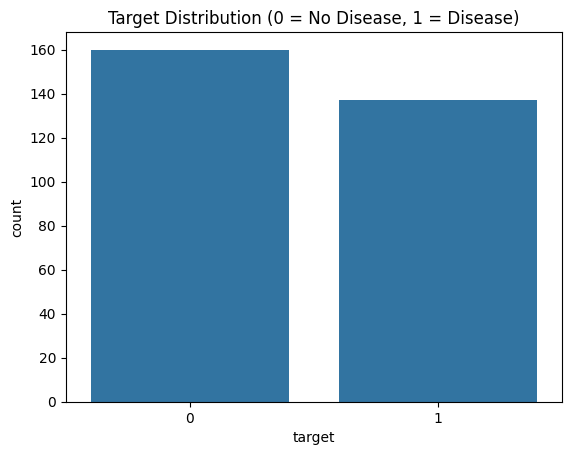

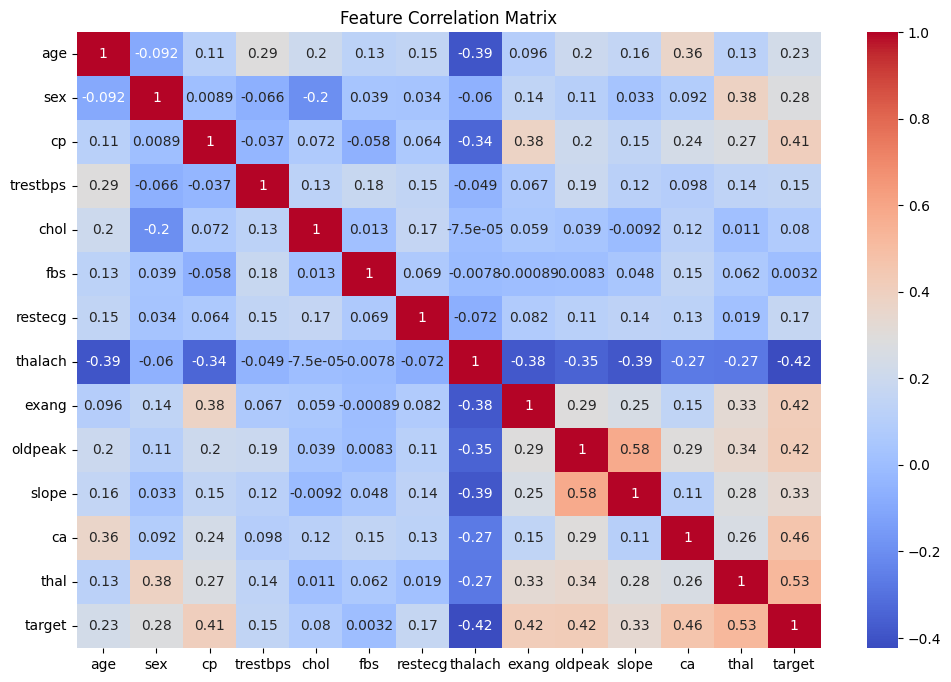

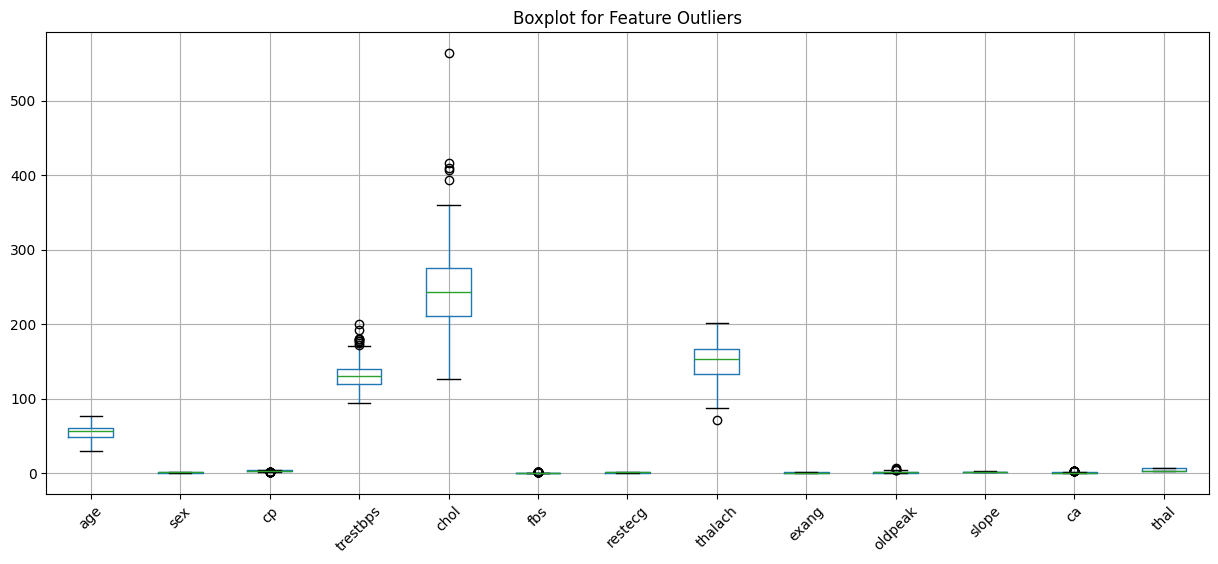

In [4]:
# 1.5 Target Variable (Heart Disease): 0 = No Disease, 1-4 = Disease
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Class balance
sns.countplot(x='target', data=df)
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Boxplot for outliers
plt.figure(figsize=(15, 6))
df.drop('target', axis=1).boxplot(rot=45)
plt.title("Boxplot for Feature Outliers")
plt.show()


In [5]:
# 1.6 Split features and target
X = df.drop('target', axis=1)
y = df['target']

# 1.7 Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1.8 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (237, 13)
X_test shape: (60, 13)
